In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

In [2]:
df = sns.load_dataset("tips")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [4]:
df.describe(include='all')

,total_bill,tip,sex,smoker,day,time,size
count,244.000000,244.000000,244,244,244,244,244.000000
unique,NaN,NaN,2,2,4,2,NaN
top,NaN,NaN,Male,No,Sat,Dinner,NaN
freq,NaN,NaN,157,151,87,176,NaN
mean,19.785943,2.998279,NaN,NaN,NaN,NaN,2.569672
std,8.902412,1.383638,NaN,NaN,NaN,NaN,0.951100
min,3.070000,1.000000,NaN,NaN,NaN,NaN,1.000000
25%,13.347500,2.000000,NaN,NaN,NaN,NaN,2.000000
50%,17.795000,2.900000,NaN,NaN,NaN,NaN,2.000000
75%,24.127500,3.562500,NaN,NaN,NaN,NaN,3.000000


In [5]:
df.isnull().sum()

,0
total_bill,0
tip,0
sex,0
smoker,0
day,0
time,0
size,0


In [6]:
df.duplicated().sum()

np.int64(1)

In [7]:
categorical = df.select_dtypes(include=['object','category']).columns
numerical = df.select_dtypes(include=['int64','float64']).columns
print(f"Categorical: {categorical}")
print(f"Numerical: {numerical}")

Categorical: Index(['sex', 'smoker', 'day', 'time'], dtype='object')
Numerical: Index(['total_bill', 'tip', 'size'], dtype='object')


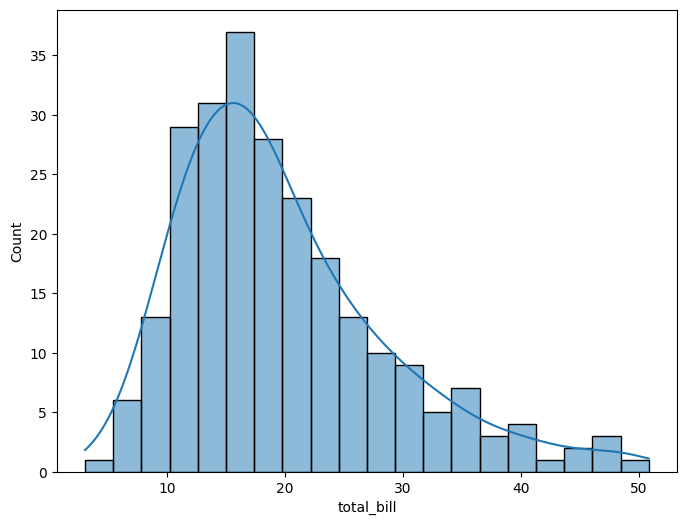

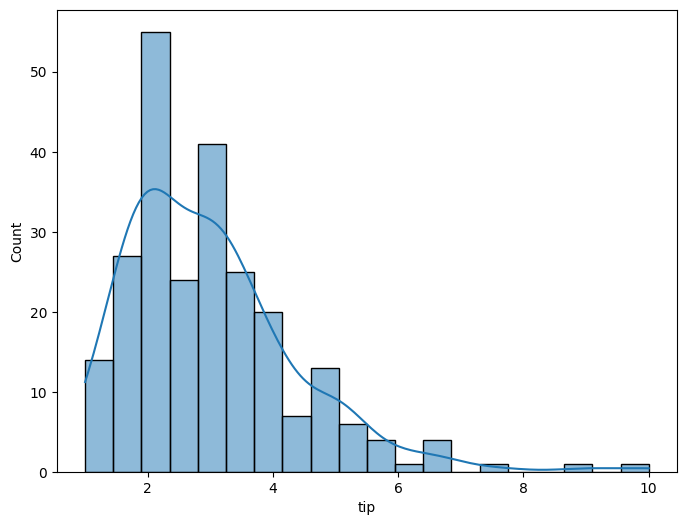

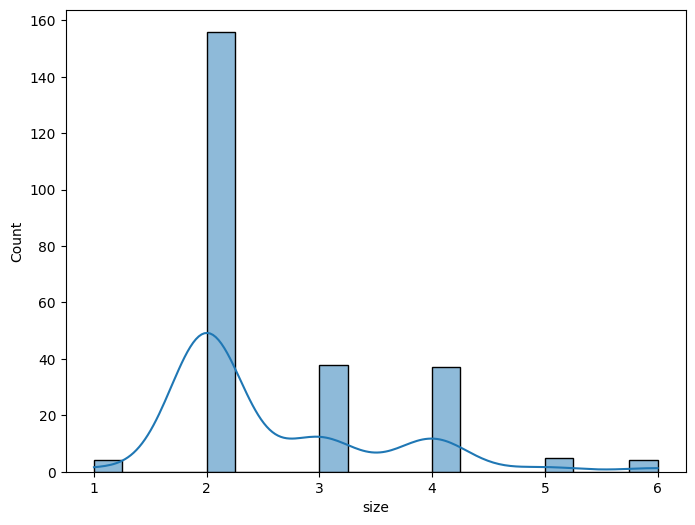

In [8]:
for col in numerical:
  plt.figure(figsize=(8,6))
  sns.histplot(df[col],bins=20,kde=True)
  plt.show()

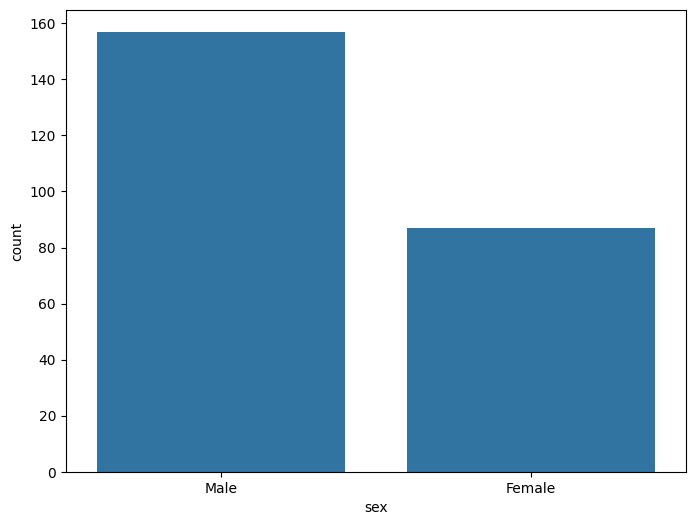

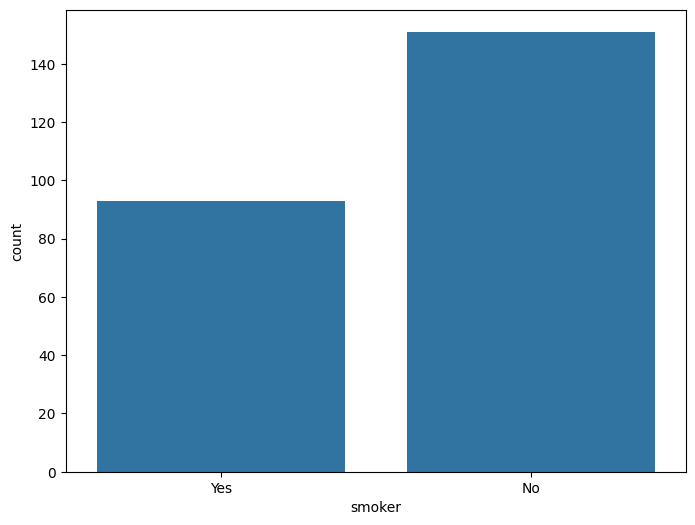

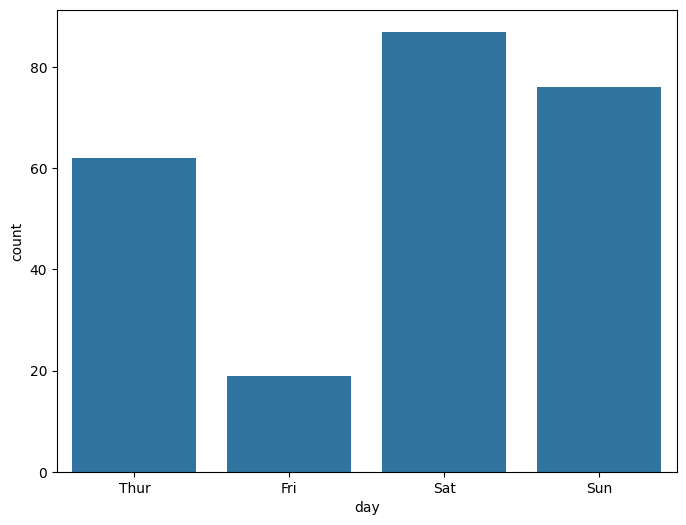

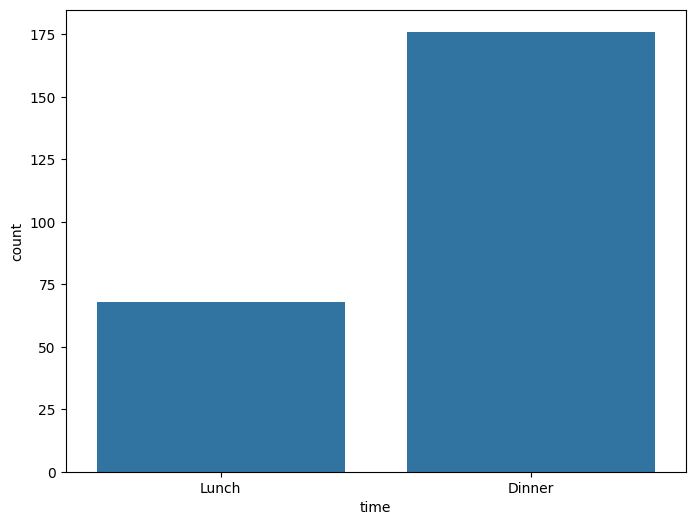

In [9]:
for col in categorical:
  plt.figure(figsize=(8,6))
  sns.countplot(x=df[col])
  plt.show()

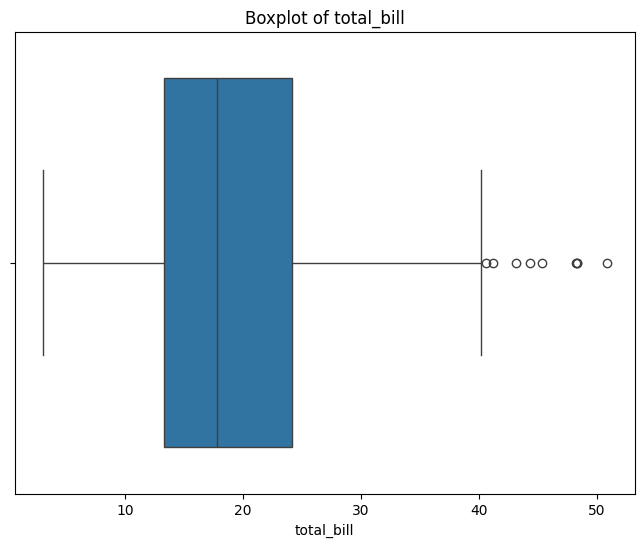

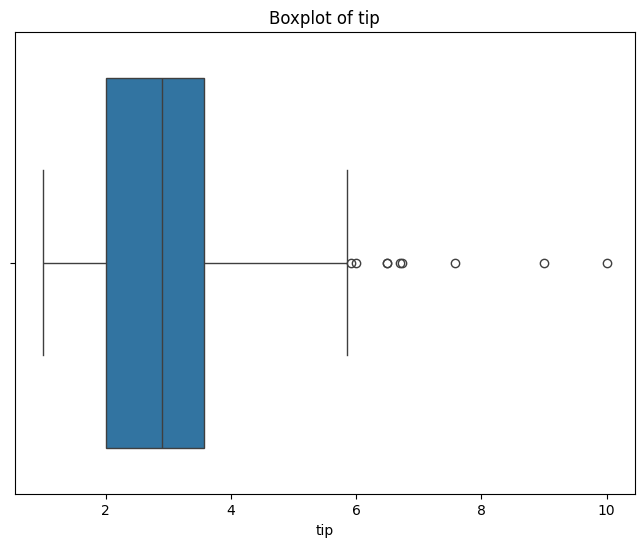

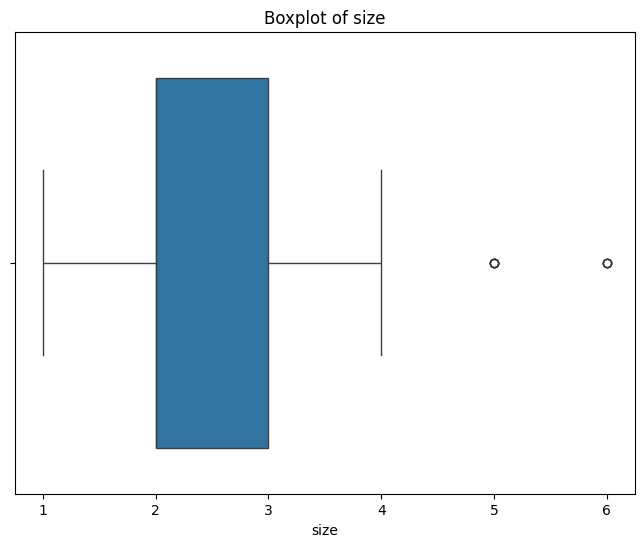

In [10]:
for col in numerical:
  plt.figure(figsize=(8,6))
  sns.boxplot(x=df[col])
  plt.title(f"Boxplot of {col}")
  plt.show()

In [11]:
df = df.drop_duplicates()

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 243 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  243 non-null    float64 
 1   tip         243 non-null    float64 
 2   sex         243 non-null    category
 3   smoker      243 non-null    category
 4   day         243 non-null    category
 5   time        243 non-null    category
 6   size        243 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 9.1 KB


In [13]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [14]:
label_en = [col for col in categorical if df[col].nunique() == 2]
hot_en = [col for col in categorical if df[col].nunique() > 2]
print(hot_en)
print(label_en)

['day']
['sex', 'smoker', 'time']


In [15]:
for col in label_en:
  le = LabelEncoder()
  df[col] = le.fit_transform(df[col])

In [16]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,Sun,0,2
1,10.34,1.66,1,0,Sun,0,3
2,21.01,3.50,1,0,Sun,0,3
3,23.68,3.31,1,0,Sun,0,2
4,24.59,3.61,0,0,Sun,0,4


In [17]:
for col in hot_en:
  df = pd.get_dummies(df,columns=[col])
df.head()

,total_bill,tip,sex,smoker,time,size,day_Thur,day_Fri,day_Sat,day_Sun
0,16.99,1.01,0,0,0,2,False,False,False,True
1,10.34,1.66,1,0,0,3,False,False,False,True
2,21.01,3.50,1,0,0,3,False,False,False,True
3,23.68,3.31,1,0,0,2,False,False,False,True
4,24.59,3.61,0,0,0,4,False,False,False,True


<Axes: >

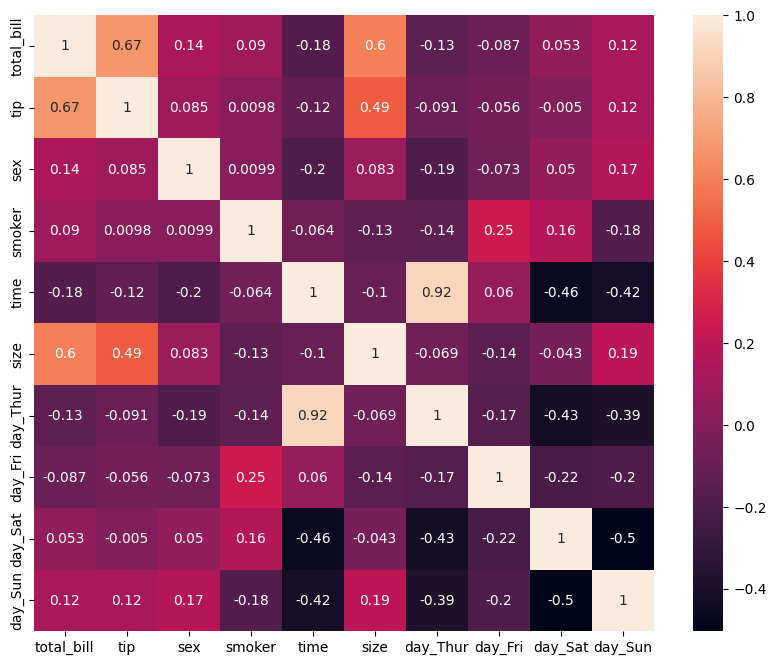

In [18]:
corr = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True)

In [19]:
corr_matrix = df.corr()
threshold = 0.5
cols_to_drop = [col for col in corr_matrix.columns
                if all((corr_matrix[col].drop(col) < threshold) & (corr_matrix[col].drop(col) > -threshold))]
df_filtered = df.drop(columns=cols_to_drop)
print("Dropped columns:", cols_to_drop)
print(df_filtered.head())

Dropped columns: ['sex', 'smoker', 'day_Fri']
   total_bill   tip  time  size  day_Thur  day_Sat  day_Sun
0       16.99  1.01     0     2     False    False     True
1       10.34  1.66     0     3     False    False     True
2       21.01  3.50     0     3     False    False     True
3       23.68  3.31     0     2     False    False     True
4       24.59  3.61     0     4     False    False     True


In [21]:
X = df.drop(columns=["tip"])
y = df["tip"]

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [24]:
y_pred = model.predict(X_test)

In [25]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [29]:
print(f"Slope (m): {model.coef_[0]:.4f}")
print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

Slope (m): 0.0855
Mean Squared Error (MSE): 1.1730028226689742
R² Score: 0.5185656337107047
Intercept: 0.7074208184990183
Coefficients: [ 0.08548255  0.01816202 -0.0521302   0.19466941  0.2109895  -0.1051401
 -0.05530834  0.04797471  0.11247373]


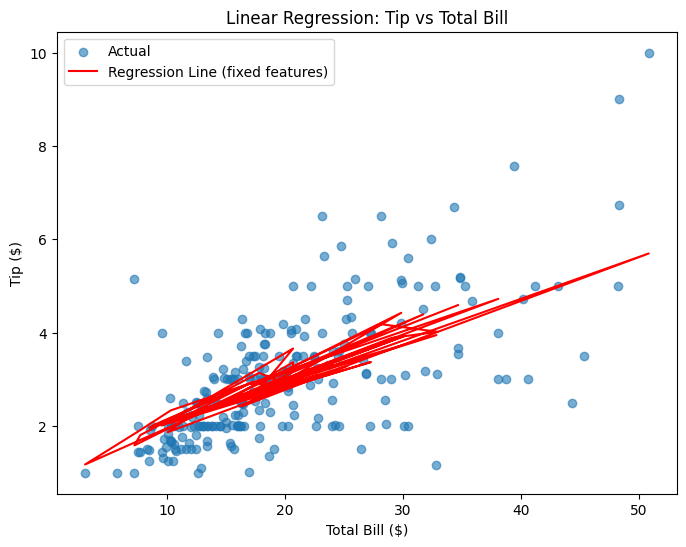

In [34]:
plt.figure(figsize=(8,6))
plt.scatter(df['total_bill'], df['tip'], alpha=0.6, label="Actual")
plt.plot(X_test['total_bill'], y_pred, color="red", label="Regression Line (fixed features)")
plt.xlabel("Total Bill ($)")
plt.ylabel("Tip ($)")
plt.title("Linear Regression: Tip vs Total Bill")
plt.legend()
plt.show()